<a href="https://colab.research.google.com/github/marinavillaschi/imersaodados3_alura/blob/main/An%C3%A1lise_de_Novos_F%C3%A1rmacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de Novos Fármacos

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*


<center><img width="90%" src="http://images.unsplash.com/photo-1587854692152-cbe660dbde88?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>

<center>Photo by <a href="https://unsplash.com/@victoriabcphotographer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Christina Victoria Craft</a> on <a href="https://unsplash.com/s/photos/pharmacy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>
  
Esse projeto foi desenvolvido durante a 3ª edição da Imersão Dados da Alura.

Nessa imersão nós mergulhamos no universo da biologia e da biotecnologia e exploramos uma base de dados da área.

Sabemos que esse banco de dados se refere a drogas administradas à culturas de células.

# Importando os dados

Os dados utilizados para esse projeto estão disponíveis neste [repositório do Github](https://github.com/alura-cursos/imersaodados3/tree/main/dados) da Alura.

Esse projeto foi inspirado em um desafio do [Laboratory for Innovation Science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [kaggle](https://www.kaggle.com/c/lish-moa).





In [110]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# criando uma variável com arquivo
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

# importando o arquivo para um DataFrame
df = pd.read_csv(url_dados, compression = 'zip')

# Análise Exploratória dos Dados - experimentos

Vamos começar a conhecer nossos dados através da Análise Exploratória, passo extremamente importante de qualquer projeto de Ciência de Dados.

### Variáveis e entradas

In [111]:
# verificando o tamanho do dataframe
print("Entradas:  ", df.shape[0], "\nVariáveis: ", df.shape[1])

Entradas:   23814 
Variáveis:  877


In [112]:
# imprimindo as 5 primeiras entradas do dataframe
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [113]:
# imprimindo as 5 últimas entradas do dataframe
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


Podemos perceber que temos colunas de fácil interpretabilidade como `id`, `tratamento`, `tempo`, `dose` e `droga`. Outras colunas como `g-0` até `c-99`, inicialmente não nos trazem muita informação.

Vamos começar investigando quais os valores de entradas da coluna `tratamento`.

In [114]:
# verificando valores unicos para tratamento
df.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

Encontramos dois valores de entradas para `tratamento`: `com_droga` e `com_controle`.

Com droga, como o próprio nome nos diz, é quando estamos aplicando algum tipo de droga para a amostra. Já com o controle é uma técnica estatística em que isolamos as outras varíaveis e observamos apenas a variável de interesse.

Vamos investigar agora a variável `tempo`.


In [115]:
# verificando valores unicos para tempo
df.tempo.unique()

array([24, 72, 48])

Encontramos três valores de entradas para `tempo`: 24, 72 e 48. Podemos deduzir que essa variável se refere ao tempo em horas de exposição à droga.

Vamos investigar agora a variável `dose`.


In [116]:
# verificando valores unicos para dose
df.dose.unique()

array(['D1', 'D2'], dtype=object)

Encontramos dois valores de entradas para `dose`: `D1` e `D2`.
Podemos entender que se tratam de duas doses distintas porém não conseguimos afirmar nada categoricamente de antemão.

Vamos investigar agora a variável `droga`.

In [117]:
# verificando valores unicos para droga
df.droga.unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Encontramos muitos valores para `droga`, e estão codificadas. É possível que tenham sido codificados com o intuito de anonimizar os tipos de drogas usadas, para evitar qualquer tipo de olhar tendencioso que gere um viés na análise dos resultados.

Sabemos que a variável `droga` não corresponde de fato a uma droga, mas sim compostos ou mais especificamente a pequenas moléculas em experimentação para possivelmente se tornarem uma droga.

Tendo isso em mente, vamos renomear a variável `droga` para `composto`, afim de evitar má interpretação.

In [118]:
# renomeando a coluna droga
troca = {'droga': 'composto'}
df.rename(columns=troca, inplace=True)
df.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Agora sim, vamos verificar quantos tipos de compostos foram utilizados nesse estudo.

In [119]:
# verificando quantas entradas distintas temos para composto
print('Foram utilizados {} tipos de compostos.'.format(df.composto.nunique()))
print('\n')

# verificando os 5 compostos mais utilizadas
print('5 compostos mais utilizados:')
print(df.composto.value_counts().head())

Foram utilizados 3289 tipos de compostos.


5 compostos mais utilizados:
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64


Vamos investigar agora a variável `g-0`.

In [120]:
# verificando valores unicos para g-0
df['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

Encontramos novamente muitos valores para `g-0` que não nos trazem muita informação sobre o que representam.

Com o auxílio da Vanessa, especialista que acompanhou a imersão, sabemos que essa letra 'g' da coluna remete à palavra gene. Ou seja, esses números nos dizem a expressão de cada gene frente aos compostoss ou a exposição.

Aparentemente esses números foram padronizados, o que é bastante comum no meio científico para criarmos um intervalo não muito grande, em que a média seja 0 e dessa forma possamos compará-los de alguma forma.

Vamos filtrar os dados dessa coluna `g-0` somente com as entradas que tenham valores positivos, ou seja, acima da média que é 0.

Antes disso, vamos eliminar o hífen para que a biblioteca `pandas` não dê erro.


In [121]:
# criando uma cópia do dataframe para realizar as alterações
df2 = df.copy()

# eliminando o hífen do nome das variáveis
df2.columns = df2.columns.str.replace('-', '')
df2.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Com os hífens eliminados, vamos fazer a filtragem dos valores positivos da variável `g-0`.

In [122]:
# filtrando as entradas positivas de g-0
df2_filtrados = df2.query('g0 > 0')
df2_filtrados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


## Distribuição do dataset

Vamos analisar agora a distribuição das variáveis, começando por `tratamento`.


com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64




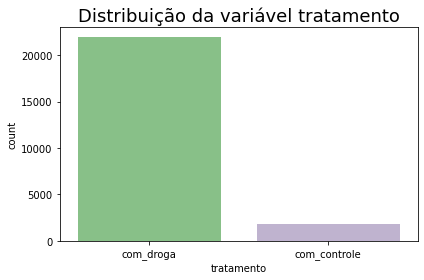

In [123]:
# ver distribuição variável tratamento
print(df.tratamento.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualização
fig, ax = plt.subplots()
sns.countplot(x=df.tratamento, ax=ax, palette='Accent')
ax.set_title('Distribuição da variável tratamento', fontsize=18)
plt.tight_layout()

É possível perceber um desbalanceamento da variável `tratamento`, onde 92% das colonias de células foram tratadas com drogas e apenas 8% com controle.

Esse desbalanceamento faz sentido uma vez que várias drogas foram testadas ao mesmo tempo que independente do número de drogas, só é necessário um grupo de controle.

Vamos investigar a variável `tempo`.



48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64




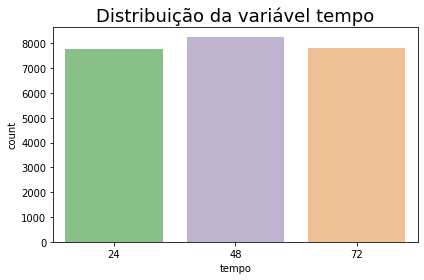

In [124]:
# ver distribuição variável tempo
print(df.tempo.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualização
fig, ax = plt.subplots()
sns.countplot(x=df.tempo, ax=ax, palette='Accent')
ax.set_title('Distribuição da variável tempo', fontsize=18)
plt.tight_layout()

A variável `tempo` diferentemente da anterior se apresenta bem balanceada entre os três valores de entradas (24, 48 e 72)

Vamos continuar nossa investigação, agora com a variável `dose`.

D1    0.510078
D2    0.489922
Name: dose, dtype: float64




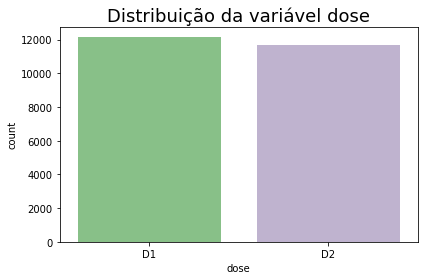

In [125]:
# ver distribuição variável dose
print(df.dose.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualização
fig, ax = plt.subplots()
sns.countplot(x=df.dose, ax=ax, palette='Accent')
ax.set_title('Distribuição da variável dose', fontsize=18)
plt.tight_layout()

A variável `dose` também se apresenta balanceada entre os dois valores de entradas (D1 e D2).

Vamos investigar agora a variável `composto`. Como temos muitos compostoso conforme verificamos anteriormente, fica difícil visualizar a distribuição de todos. Vamos plotar então apenas os 5 compostos mais utilizados.

In [126]:
compostos = df.composto.value_counts().index[0:5].sort_values(ascending=True)
compostos

Index(['5628cb3ee', '87d714366', '8b87a7a83', '9f80f3f77', 'cacb2b860'], dtype='object')

5 compostos mais utilizados:
 Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object') 



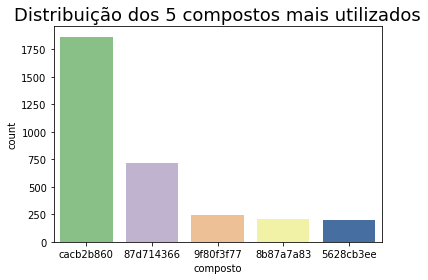

In [127]:
# ver distribuição dos 5 compostos mais utilizados
compostos = df.composto.value_counts().index[0:5]
print('5 compostos mais utilizados:\n',compostos,'\n')

# imprimir countplot para visualização
fig, ax = plt.subplots()
sns.countplot(x='composto', data=df.query('composto in @compostos'), order=compostos, palette='Accent')
ax.set_title('Distribuição dos 5 compostos mais utilizados', fontsize=18)
plt.tight_layout()



## Análises estatísticas

Vamos entender melhor as características estatísticas dos dados que ainda não temos muito conhecimento que são as variáveis `g` e `c`.

É sabido que as variáveis `g` dizem respeito a genes, e as variáveis `c` dizem respeito a tipos celulares.

Vamos começar plotando o resumo estatístico das variáveis numéricas.

In [128]:
# imprimir o resumo estatístico
df2.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

Vamos plotar histogramas afim de visualizarmos melhor essas características. Vamos começar com duas das variáveis `g`, escolhidas aleatoriamente: `g0` e `g50`.

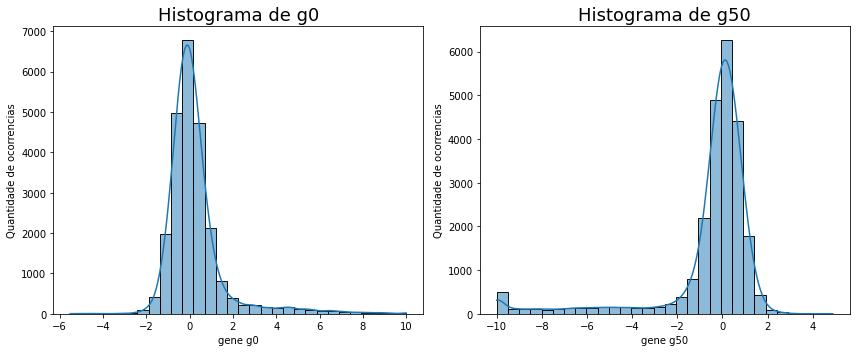

In [129]:
# plotando os histogramas de g0 e g50
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(x='g0', data = df2, bins=30, ax=ax1, kde=True)
ax1.set_title('Histograma de g0', fontsize=18)
ax1.set_ylabel('Quantidade de ocorrencias')
ax1.set_xlabel('gene g0')

sns.histplot(x='g50', data = df2, bins=30, ax=ax2, kde=True)
ax2.set_title('Histograma de g50', fontsize=18)
ax2.set_ylabel('Quantidade de ocorrencias')
ax2.set_xlabel('gene g50')

plt.tight_layout()

Os histogramas possuem a mesma "cara", aparentemente elas se assemelham a uma curva de distribuição normal, confirmando o que já havia sido levantado anteriormente.

Porém o intervalo de distribuição delas é diferente, o `g0` parece estar entre -6 e 10 e o `g50` parece estar entre -10 e 4.

Como temos uma quantidade muito grande de variáveis `g` e não seria produtivo nem visualmente esclarecedor plotarmos os histogramas de todas elas, vamos plotar o histograma da média, do mínimo e do máximo de todas essas variáveis `g`.

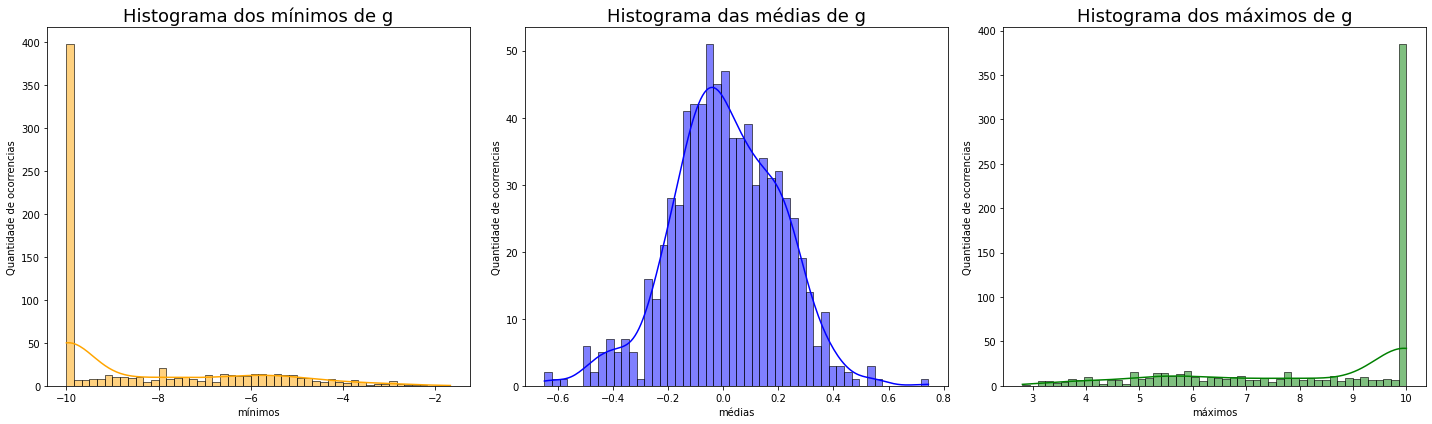

In [130]:
# plotando histogramas dos mínimos, média e máximo das variáveis g
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['min'], bins=50, ax=ax1, kde=True, color='orange')
ax1.set_title('Histograma dos mínimos de g', fontsize=18)
ax1.set_ylabel('Quantidade de ocorrencias')
ax1.set_xlabel('mínimos')

sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['mean'], bins=50, ax=ax2, kde=True, color='blue')
ax2.set_title('Histograma das médias de g', fontsize=18)
ax2.set_ylabel('Quantidade de ocorrencias')
ax2.set_xlabel('médias')

sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['max'], bins=50, ax=ax3, kde=True, color='green')
ax3.set_title('Histograma dos máximos de g', fontsize=18)
ax3.set_ylabel('Quantidade de ocorrencias')
ax3.set_xlabel('máximos')

plt.tight_layout()

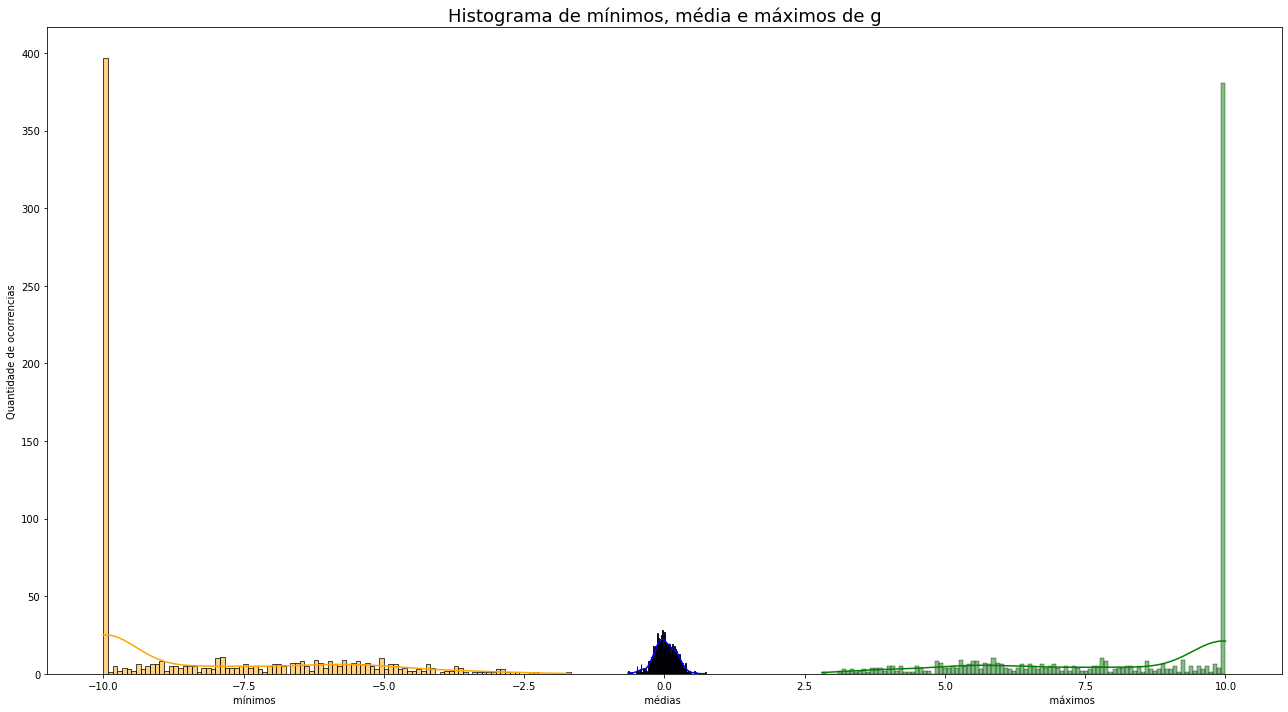

In [131]:
# plotando os três histogramas juntos (min, media e max)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))

sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['mean'], bins=100, kde=True, color='blue')
sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['min'], bins=100, kde=True, color='orange')
sns.histplot(data=df2, x=df2.loc[:, 'g0':'g771'].describe().T['max'], bins=100, kde=True, color='green')

ax.set_title('Histograma de mínimos, média e máximos de g', fontsize=18)
ax.set_ylabel('Quantidade de ocorrencias')
ax.set_xlabel('mínimos                                                                                                                      médias                                                                                                                      máximos')

plt.tight_layout()

Os histogramas de mínimos e máximos apresentam certa simetria entre si, com picos nos valores -10 e +10, limites mínimos e máximos respectivamente.

O histograma das médias se assemelha de certa forma ao histograma individual de cada variável, ou seja, mantém uma forma normalizada.

Vamos fazer o mesmo para as variáveis `g`. Começaremos plotando duas delas, também escolhidas aleatoriamente: `c0` e `c50`.

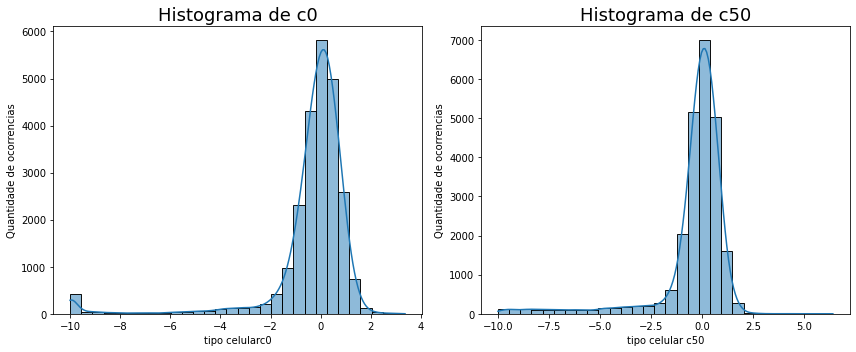

In [132]:
# plotando os histogramas de c0 e c50
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(x='c0', data = df2, bins=30, ax=ax1, kde=True)
ax1.set_title('Histograma de c0', fontsize=18)
ax1.set_ylabel('Quantidade de ocorrencias')
ax1.set_xlabel('tipo celularc0')

sns.histplot(x='c50', data = df2, bins=30, ax=ax2, kde=True)
ax2.set_title('Histograma de c50', fontsize=18)
ax2.set_ylabel('Quantidade de ocorrencias')
ax2.set_xlabel('tipo celular c50')

plt.tight_layout()

Como era de se esperar, os histogramas tem novamente a mesma "cara". Como também existe uma grande quantidade dessas variáveis `c`, faremos o mesmo processo: plotar o histograma da média, do mínimo e do máximo de todas essas variáveis `c`.

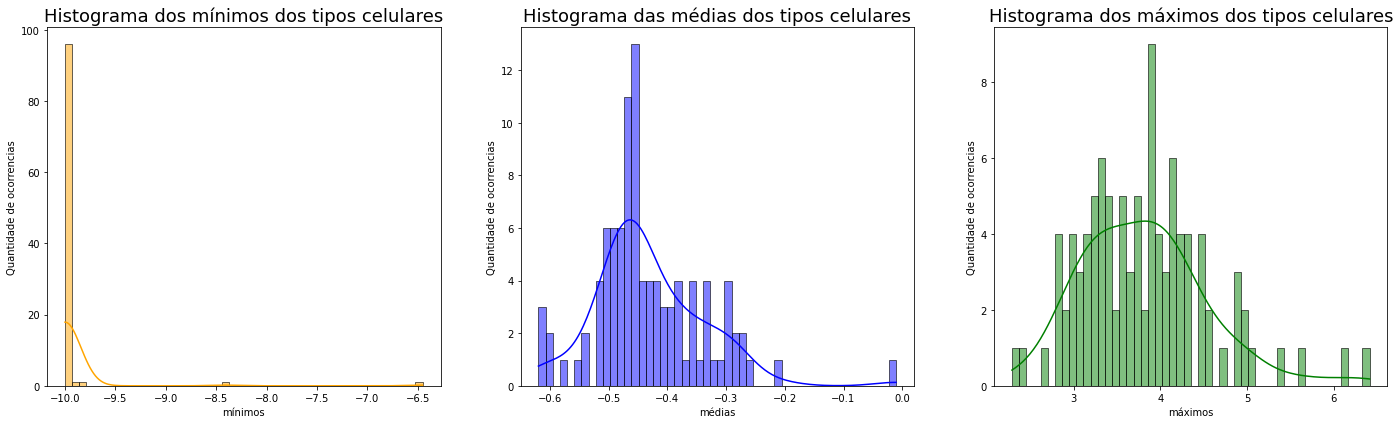

In [133]:
# plotando histogramas dos mínimos, média e máximo das variáveis c
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['min'], bins=50, ax=ax1, kde=True, color='orange')
ax1.set_title('Histograma dos mínimos dos tipos celulares', fontsize=18)
ax1.set_ylabel('Quantidade de ocorrencias')
ax1.set_xlabel('mínimos')

sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['mean'], bins=50, ax=ax2, kde=True, color='blue')
ax2.set_title('Histograma das médias dos tipos celulares', fontsize=18)
ax2.set_ylabel('Quantidade de ocorrencias')
ax2.set_xlabel('médias')

sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['max'], bins=50, ax=ax3, kde=True, color='green')
ax3.set_title('Histograma dos máximos dos tipos celulares', fontsize=18)
ax3.set_ylabel('Quantidade de ocorrencias')
ax3.set_xlabel('máximos')

plt.tight_layout()

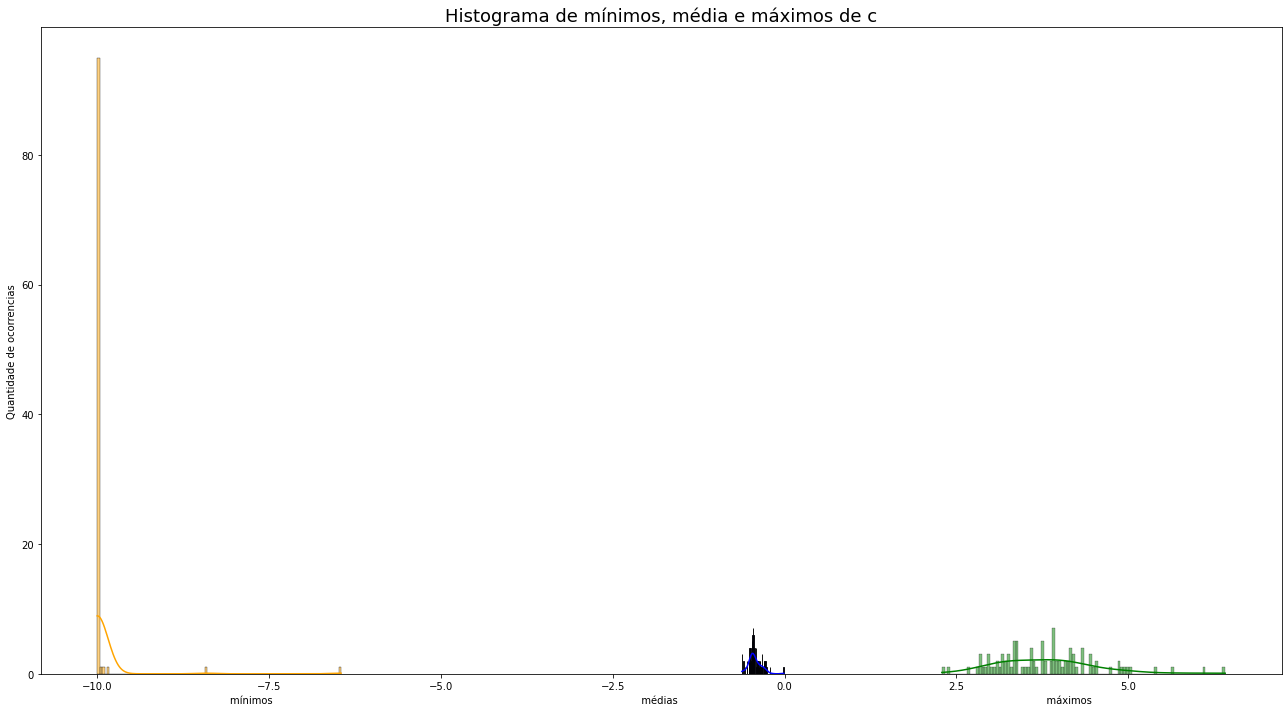

In [134]:
# plotando os três histogramas juntos (min, media e max)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10))

sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['mean'], bins=100, kde=True, color='blue')
sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['min'], bins=100, kde=True, color='orange')
sns.histplot(data=df2, x=df2.loc[:, 'c0':'c99'].describe().T['max'], bins=100, kde=True, color='green')

ax.set_title('Histograma de mínimos, média e máximos de c', fontsize=18)
ax.set_ylabel('Quantidade de ocorrencias')
ax.set_xlabel('mínimos                                                                                                                      médias                                                                                                                      máximos')

plt.tight_layout()

Diferentemente das variáveis `g`, as variáveis `c` não tem um comportamento de mínimo e máximo simétricos, nem as médias muito normalizadas. É possível observar um pico somente no histograma de mínimos no valor -10.

É provável que o processo de padronização dessas variáveis tenha sido feito de formas distintas.

Vamos agora plotar boxplots dos gens de maior e menor valor, afim de visualizar e obter mais informações.

In [135]:
# identificando o maior e menor g
higher_g = df2.loc[:, 'g0':'g771'].mean().sort_values(ascending=False).head(1).index
lower_g = df2.loc[:, 'g0':'g771'].mean().sort_values(ascending=False).tail(1).index
print('maior g:',higher_g)
print('menor g:',lower_g)

maior g: Index(['g707'], dtype='object')
menor g: Index(['g370'], dtype='object')


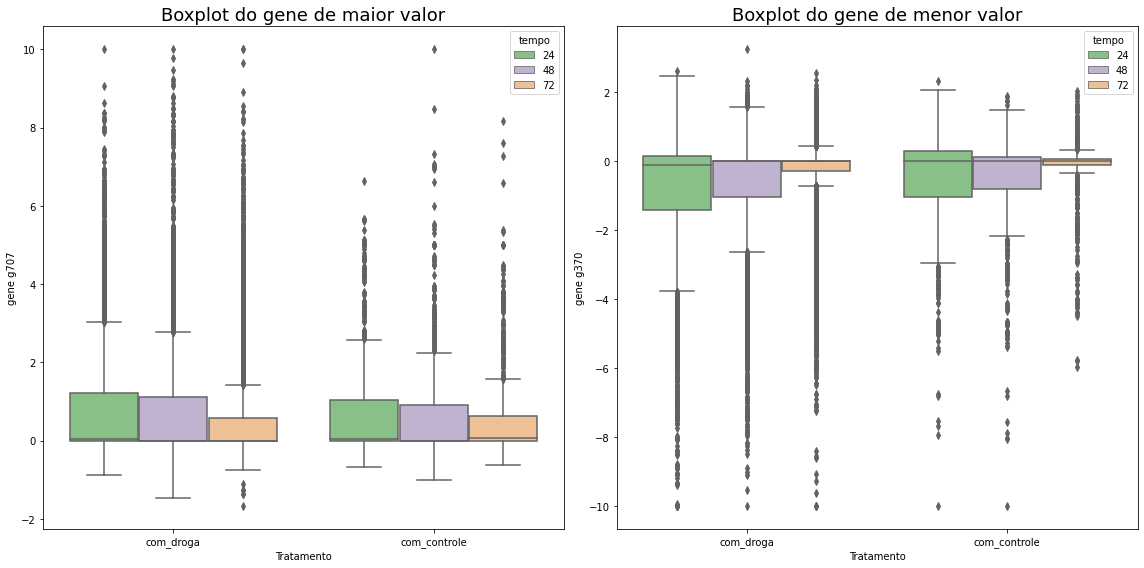

In [136]:
# plotando boxplots para o g de maior valor e menor valor
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.boxplot(x='tratamento', y='g707', hue='tempo', data=df2, ax=ax1, palette='Accent')
ax1.set_title("Boxplot do gene de maior valor", fontsize=18)
ax1.set_xlabel('Tratamento')
ax1.set_ylabel('gene g707')

sns.boxplot(x='tratamento', y='g370', hue='tempo', data=df2, ax=ax2, palette='Accent')
ax2.set_title("Boxplot do gene de menor valor", fontsize=18)
ax2.set_xlabel('Tratamento')
ax2.set_ylabel('gene g370')

plt.tight_layout()

Pelos boxplots plotados é possível perceber que para os dois genes foram encontrados muitos outliers, ou seja, valores discrepantes da maioria dos valores encontrados, tanto para tratamento com droga quanto para controle.

Todas as médias se encontram próximas de 0, confirmando o que já haviamos percebido nos histogramas.

É possível perceber que o gene `g707` que obteve maior valor possui muitos outliers na parte superior, ou seja, positivos. Em contrapartida, o gene `g370` que obteve menor valor possui a maioria de seus outliers na parte inferior, ou seja, negativos.

Agora vamos verificar o mesmo para a variáveis `c`.

In [137]:
# identificando o maior e menor c
higher_c = df2.loc[:, 'c0':'c99'].mean().sort_values(ascending=False).head(1).index
lower_c = df2.loc[:, 'c0':'c99'].mean().sort_values(ascending=False).tail(1).index
print('maior c:',higher_c)
print('menor c:',lower_c)

maior c: Index(['c74'], dtype='object')
menor c: Index(['c65'], dtype='object')


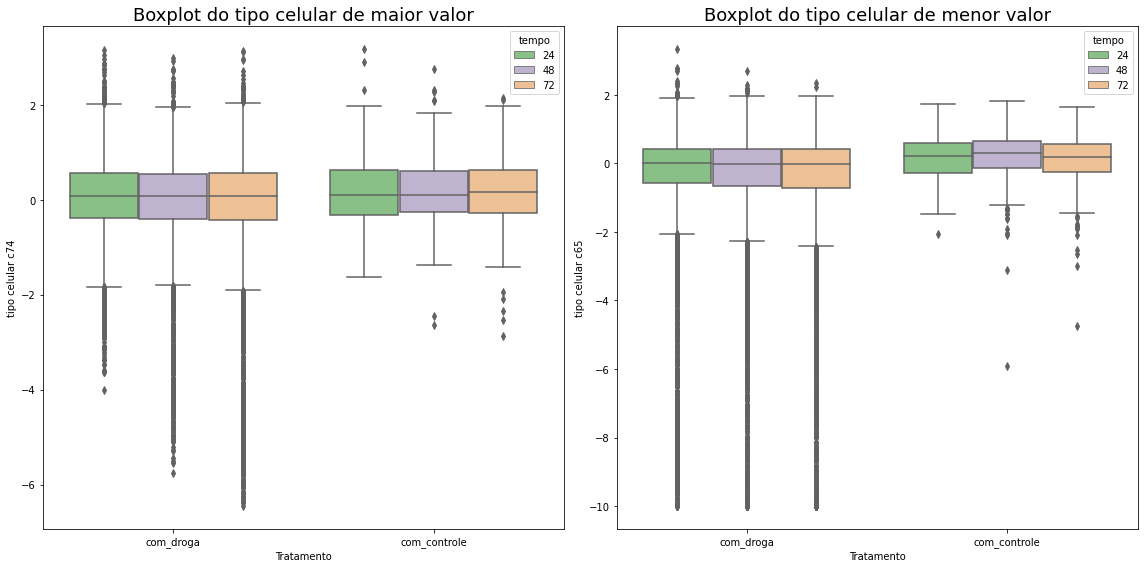

In [138]:
# plotando boxplots para o g de maior valor e menor valor
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.boxplot(x='tratamento', y='c74', hue='tempo', data=df2, ax=ax1, palette='Accent')
ax1.set_title("Boxplot do tipo celular de maior valor", fontsize=18)
ax1.set_xlabel('Tratamento')
ax1.set_ylabel('tipo celular c74')

sns.boxplot(x='tratamento', y='c65', hue='tempo', data=df2, ax=ax2, palette='Accent')
ax2.set_title("Boxplot do tipo celular de menor valor", fontsize=18)
ax2.set_xlabel('Tratamento')
ax2.set_ylabel('tipo celular c65')

plt.tight_layout()

Diferentemente das variáveis `g`, as variáveis `c` apresentam muito mais outliers para tratamento com droga que com controle.

Tanto o tipo celular de maior valor `c74` quanto de menor valor `c65` apresentam a maioria dos outliers negativos.

## Correlação entre variáveis

Vamos explorar a relação entre as variáveis numéricas. 

Vamos plotar uma tabela de frequência com as variáveis `dose`, `tempo` e `tratamento`.

In [139]:
# tabela frequencia utilizando o groupby
df2.groupby(by=[df2.dose, df2.tempo, df2.tratamento]).count()['id'].unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [140]:
# tabela de frequencia em proporção pelo index com crosstab
pd.crosstab([df2.dose, df2.tempo], df2.tratamento, normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Normalizando a crosstab pelo index, ou seja, a soma total de cada linha (uma dose combinada com um tempo) é igual a 1, nos mostra mais uma vez o desbalanceamento da variável `tratamento`, onde para as duas doses (D1 e D2) e para os 3 tempos (24, 48 e 72) a proporção dos dois tipos de tratamento é mantida (~8% com_controle e ~92% com_droga).

Vamos plotar novamente, dessa vez normalizando pela coluna.

In [141]:
# tabela de frequencia em proporção pela coluna com crosstab
pd.crosstab([df2.dose, df2.tempo], df2.tratamento, normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Normalizando a crosstab pelas colunas, ou seja, a soma total de cada coluna (com_controle e com_droga) é igual a 1, nos mostra que os dados estão bem distribuídos nos três tempos (24, 48 e 72) assim como nas duas doses (D1 e D2).

Vamos plotar agora a tabela de frequência pela média e tb mediana do gene `g0`.

In [142]:
# tabela de frequencia da média do g0 com crosstab
pd.crosstab([df2.dose, df2.tempo], df2.tratamento, values=df2.g0, aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [143]:
# tabela de frequencia da mediana do g0 com crosstab
pd.crosstab([df2.dose, df2.tempo], df2.tratamento, values=df2.g0, aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

Vamos agora explorar a relação das variáveis com o auxílio do scatterplot que é um gráfico de dispersão.

Para isso, vamos pegar dois genes aleatoriamente escolhidos: `g0` e `g50`.

In [144]:
# imprimindo somente as colunas dos genes g0 e g50
print('Coordenadas do gráfico de dispersão:')
df2[['g0', 'g50']]

Coordenadas do gráfico de dispersão:


,g0,g50
0,1.0620,-0.1221
1,0.0743,1.2730
2,0.6280,-0.0978
3,-0.5138,-2.8230
4,-0.3254,-0.0803
...,...,...
23809,0.1394,-0.2505
23810,-1.3260,-0.4211
23811,0.3942,-0.2557
23812,0.6660,-4.3160


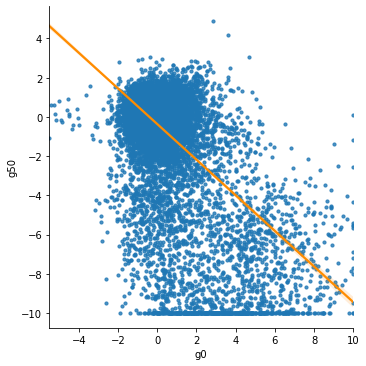

In [145]:
# plotando o scatterplot
sns.lmplot(x='g0', y='g50', scatter_kws={'s':10}, line_kws={'color':'darkorange'}, data=df2)
plt.show()

Conseguimos perceber a uma relação linear negativa entre os genes g0 e g50, ou seja, quanto maior o valor de g0, menor o valor de g50 e vice-versa.

Vamos explorar esse gráfico de dispersão usando como coluna a variável `tempo` e como linha a variável `tratamento`.

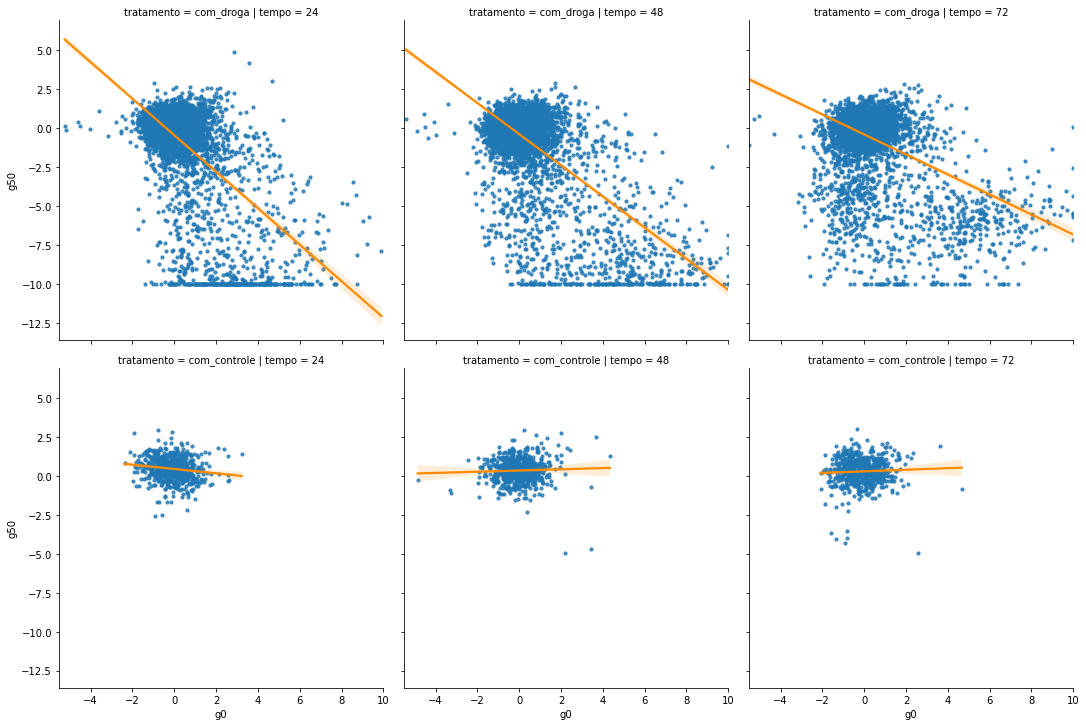

In [146]:
# plotando os scatterplots para tratamento
sns.lmplot(x='g0', y='g50', scatter_kws={'s':10}, line_kws={'color':'darkorange'}, data=df2, col='tempo', row='tratamento')
plt.show()

Podemos ver como os gráficos superiores (tratamento=com_droga) são muito diferentes dos inferiores (tratamento=com_controle).

Para tratamento=com_droga os gráficos de dispersão se mostram mais parecidos com o primeiro plotado, assumindo uma relação linear negativa entre os dois genes analisados. É possível observar que a linha sofre alterações com o passar do tempo, ela vai se horizontalizando.

Nos gráficos de tratamento=com_controle, podemos perceber maior estabilidade, sem muita dispersão e sem muita diferença com o passar do tempo, como era esperado.

Através do coeficiente de correlação iremos criar uma matrizes de correlação e gerar um *heatmap* para visualizarmos. Faremos isso para os `g0` ao `g50` e para os `c0` ao `c50` devido ao nosso limite de espaço para plotar.

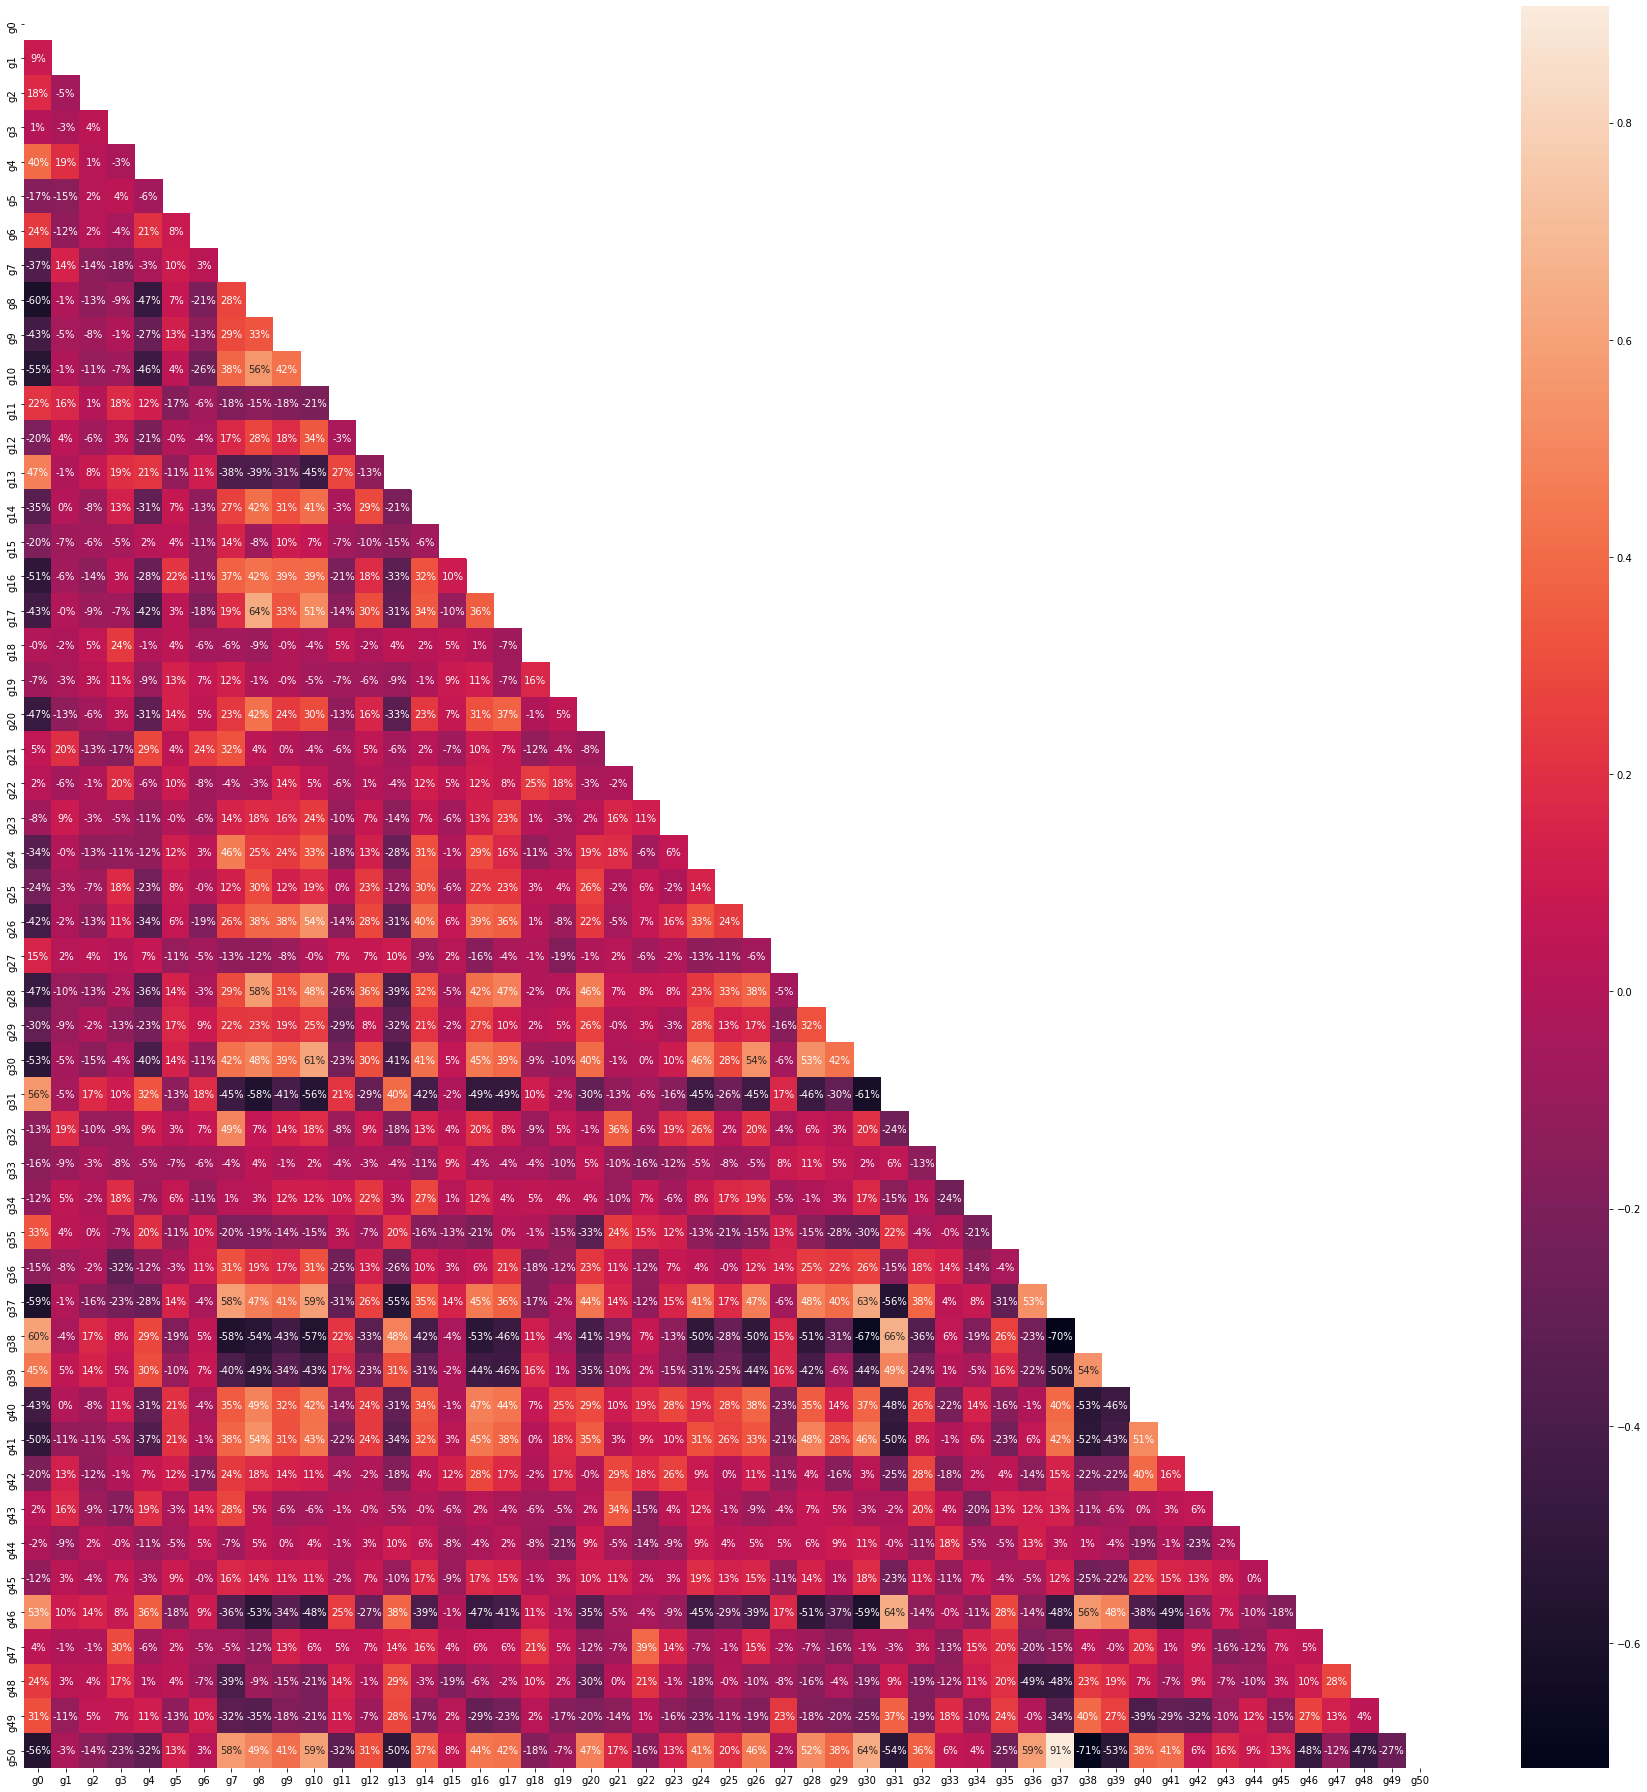

In [147]:
# criando matriz de correlação para genes
corr_g = df2.loc[:,'g0':'g50'].corr()
mask = np.triu(np.ones_like(corr_g, dtype=bool))
plt.figure(figsize=(25,25))
sns.heatmap(corr_g, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

Pelo heatmap é possível perceber que muitos genes não tem correlação significativa entre si (cores próximas ao rosa) e temos alguns pontuais que tem correlação mais forte, tanto positiva (tendendo para o laranja mais claro) quanto negativas (tendendo para o roxo escuro).

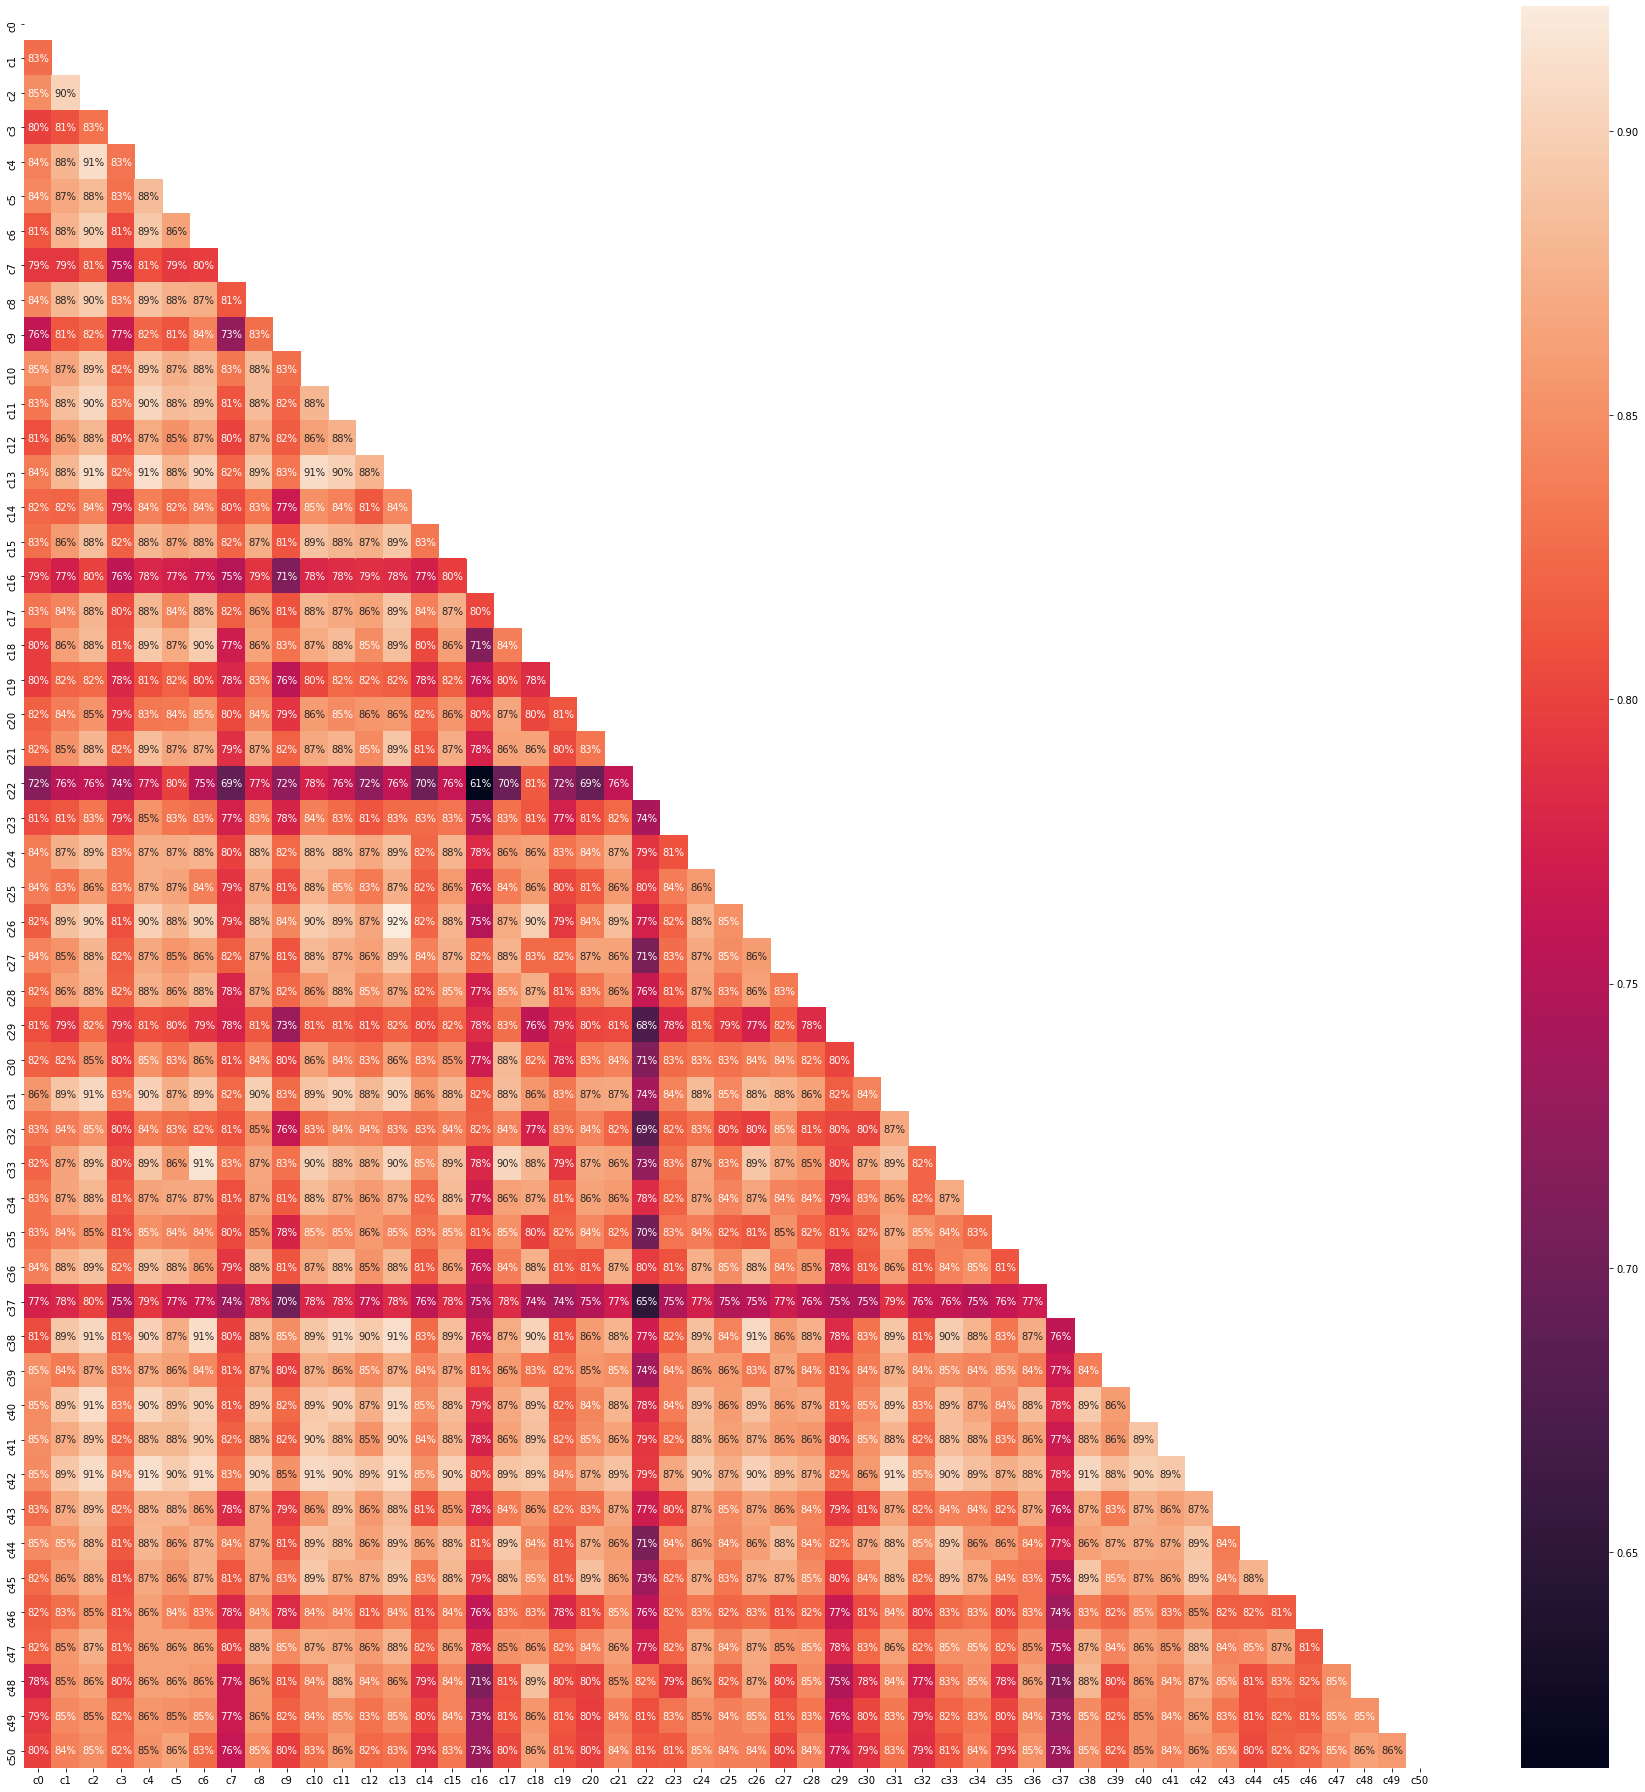

In [148]:
# criando matriz de correlação para celulas
corr_c = df2.loc[:,'c0':'c50'].corr()
mask = np.triu(np.ones_like(corr_c, dtype=bool))
plt.figure(figsize=(25,25))
sns.heatmap(corr_c, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

Com o heatmap das correlações entre os tipos celulares é possível observar alta correlação positiva (laranja claro) entre a maioria deles.
Podemos imaginar então que os grupos celulares tendem a se comportar de maneira similar aos estímulos externos dados.

Vale lembrar que essas correlações não implicam em causalidade, não podemos confundir essas duas relações.

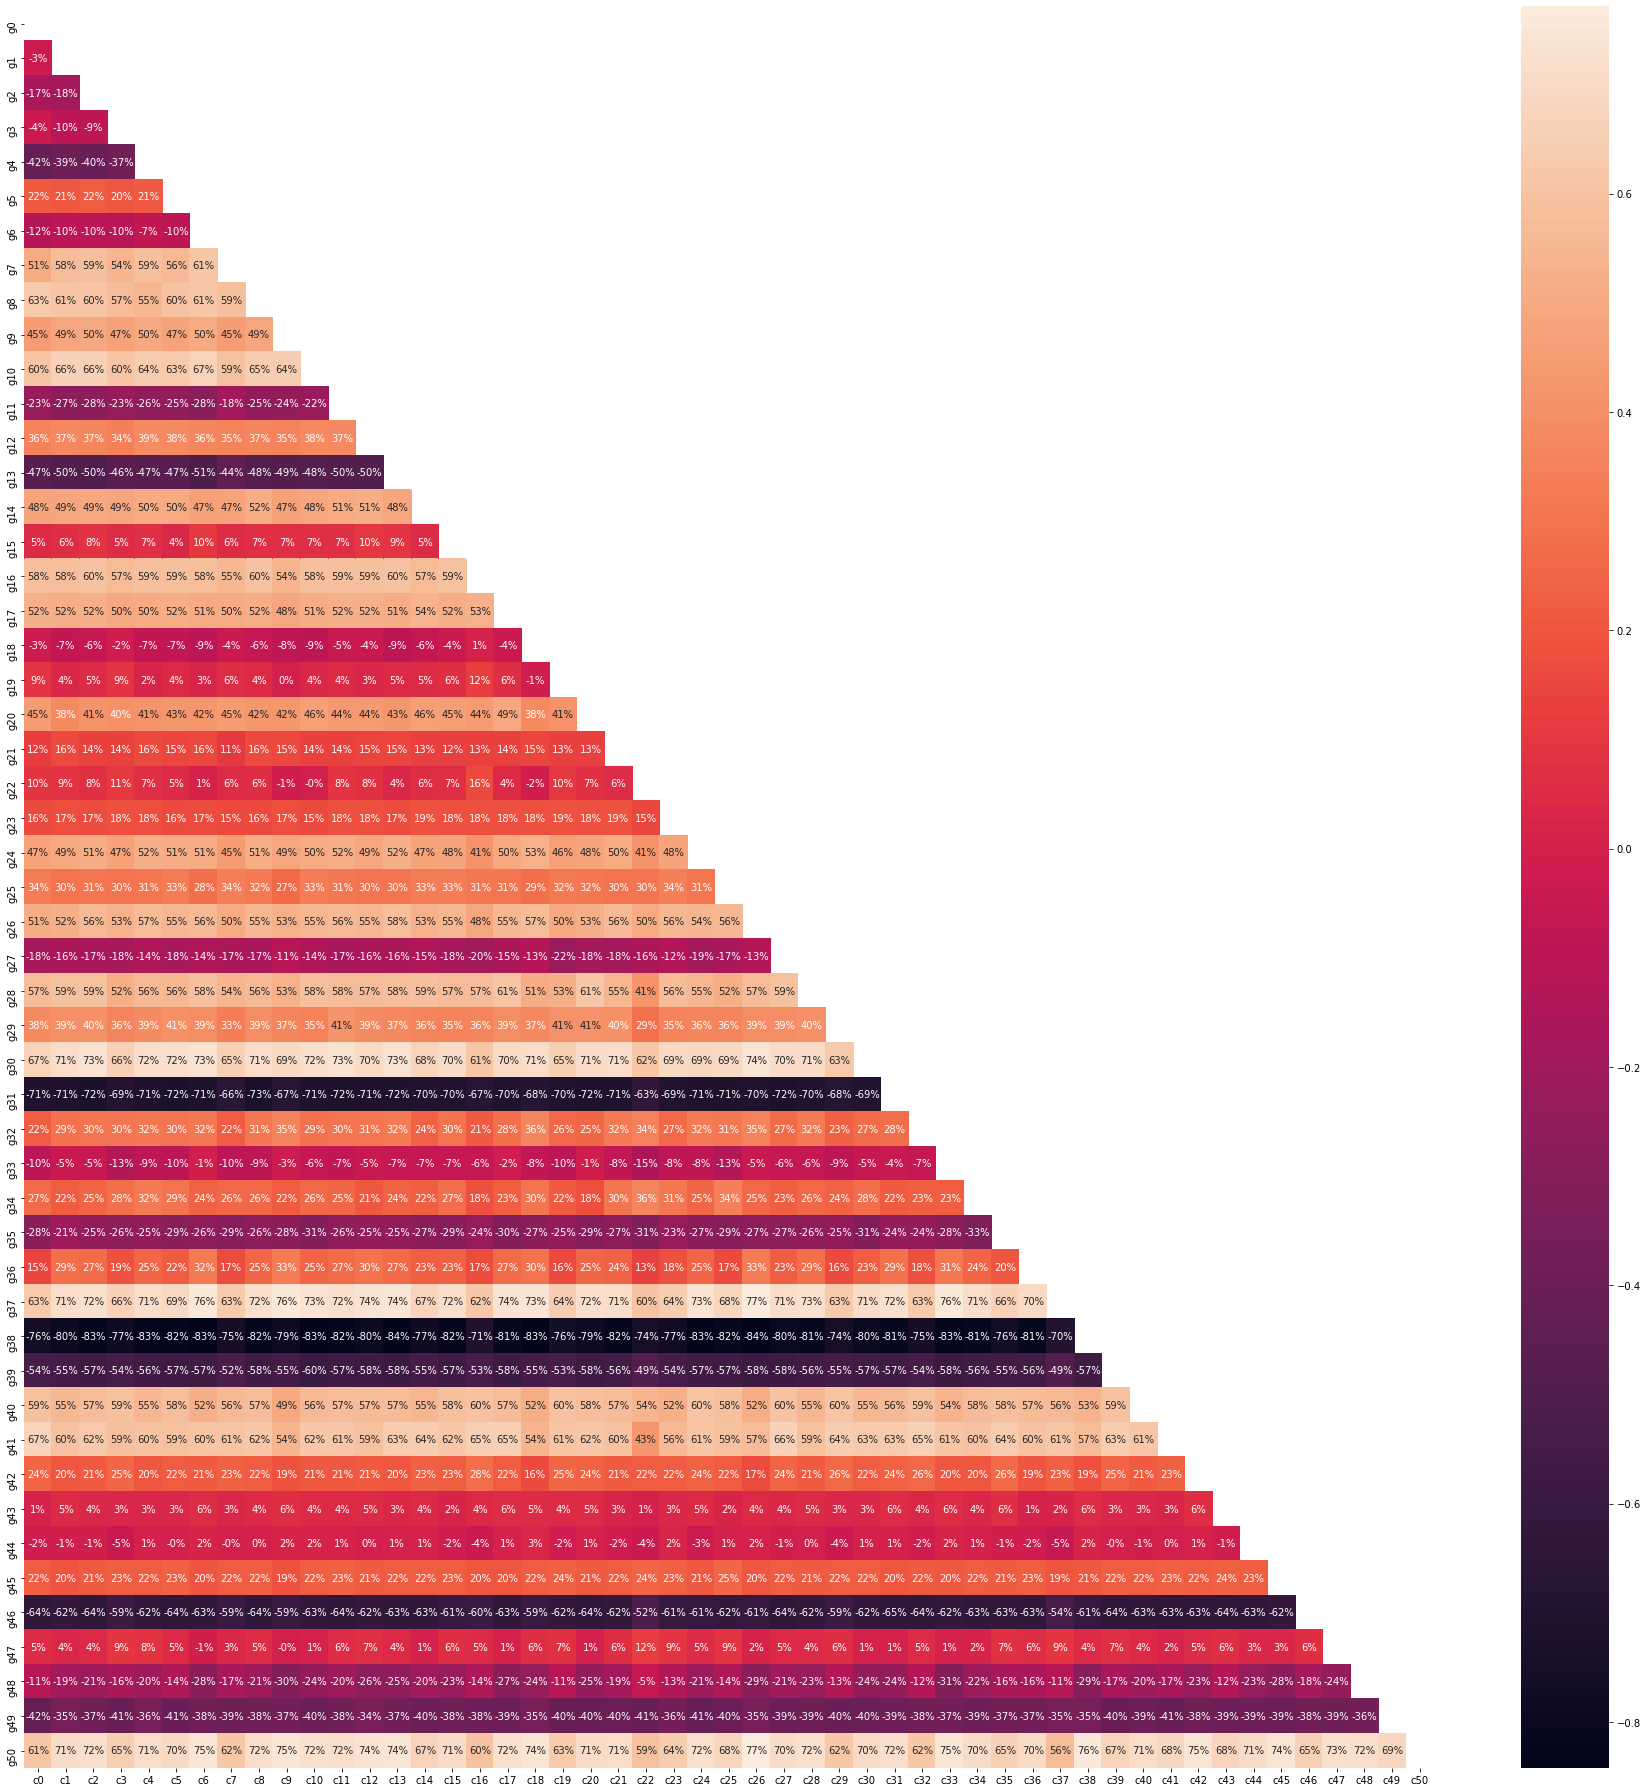

In [149]:
# criando dois dataframes de g e c selecionados
g = df2[df.tratamento == 'com_droga'].loc[:,'g0':'g50']
c = df2[df.tratamento == 'com_droga'].loc[:,'c0':'c50']

# concatenando g e c
gc = pd.concat([g, c], axis=1)

# # criando matriz de correlação para g e c
corr_gc = gc.corr().loc[:'g50','c0':]
mask = np.triu(np.ones_like(corr_gc, dtype=bool))
plt.figure(figsize=(25,25))
sns.heatmap(corr_gc, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

Esse heatmap nos mostra correlações interessantes entre os genes e os grupos celulares, de forma que a correlação se mantem linearmente, ou seja, um mesmo gene se relaciona de forma muito similar a todos os grupos celulares.

## Resumo EDA

Após realizarmos a análise exploratória dos dados, foi possível conhece-los melhor. Assim podemos fazer algumas observações:

* O dataset possui 23814 entradas e 877 variáveis;

* A variável `droga` se apresenta codificada afim de evitar viés na análise do resultado;

* A variável `droga` representa na verdade compostos, por isso a renomeamos para `composto`;

* Foram utilizados 3289 compostos diferentes;

* A variável `tratamento` apresenta desbalanceamento já que muitas drogas foram testadas e é necessário apenas um grupo de controle;

* As variáveis `g` dizem respeito a genes. Elas receberam tratamento de padronização/normalização de forma que tem média=~0;

* As variáveis `c` dizem respeito a tipos celulares. Elas também receberam tratamento de padronização/normalização, porém é possível que tenham sido tratados de forma diferente das variáveis `g`;

* Observamos que as variáveis `tempo` e `doses` apresentam boa distribuição;


# Análise Exploratória dos Dados - resultados

Agora vamos importar o dataset de resultados e analisá-los.

In [150]:
# importando o arquivo  de resultados para um DataFrame
df_r = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersaodados3/main/dados/dados_resultados.csv')

# verificando o tamanho do dataframe resultados
print("Entradas:  ", df_r.shape[0], "\nVariáveis: ", df_r.shape[1])

Entradas:   23814 
Variáveis:  207


In [151]:
# imprimindo as 5 primeiras entradas
df_r.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


É possível identificar que a coluna em comum entre os dataframes experimentos e resultados é `id`.

Vamos verificar os valores únicos das colunas.

In [152]:
# verificando os valores únicos de cada coluna
df_r.nunique()

id                                       23814
5-alpha_reductase_inhibitor                  2
11-beta-hsd1_inhibitor                       2
acat_inhibitor                               2
acetylcholine_receptor_agonist               2
                                         ...  
ubiquitin_specific_protease_inhibitor        2
vegfr_inhibitor                              2
vitamin_b                                    2
vitamin_d_receptor_agonist                   2
wnt_inhibitor                                2
Length: 207, dtype: int64

Não é possível visualizar todas as colunas mas podemos ver que muitas delas recebem dois valores únicos, ou seja, é possível que sejam variáveis categóricas binárias.

Vamos verificar os tipos.

In [153]:
# verificando quais colunas são numéricas
print(df_r.info(),'\n')
print(df_r.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB
None 

id                                       object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object


Temos apenas uma coluna não numérica que é a `id`.

Vamos verificar qual o mecanismo de ação mais foi ativado nesse estudo.

In [154]:
# soma colunas ordenado do maior pro menor
moa_count = df_r.drop('id', axis=1).sum().sort_values(ascending=False)
moa_count

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Vamos verificar quais as 10 ações do MOA (mecanismo de ação) mais utilizadas.

In [193]:
# criar uma lista com os nomes das açoes do moa ([-1] para pegar a ultima palavra)
acao_moa = [i.split('_')[-1] for i in moa_count.index ]
acao_moa[:6]

['inhibitor',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor']

In [253]:
# criando um df com as acoes e suas quantidades ordenadas do maior pro menor
df_moa_count = pd.DataFrame(data={'acao_moa':acao_moa, 'count':moa_count.values}).groupby(by=['acao_moa']).sum().sort_values(ascending=False, by='count')[:10]
df_moa_count.head(10)

,count
acao_moa,
inhibitor,9693
antagonist,3449
agonist,2330
blocker,323
agent,150
activator,115
local,80
antioxidant,73
anti-inflammatory,73


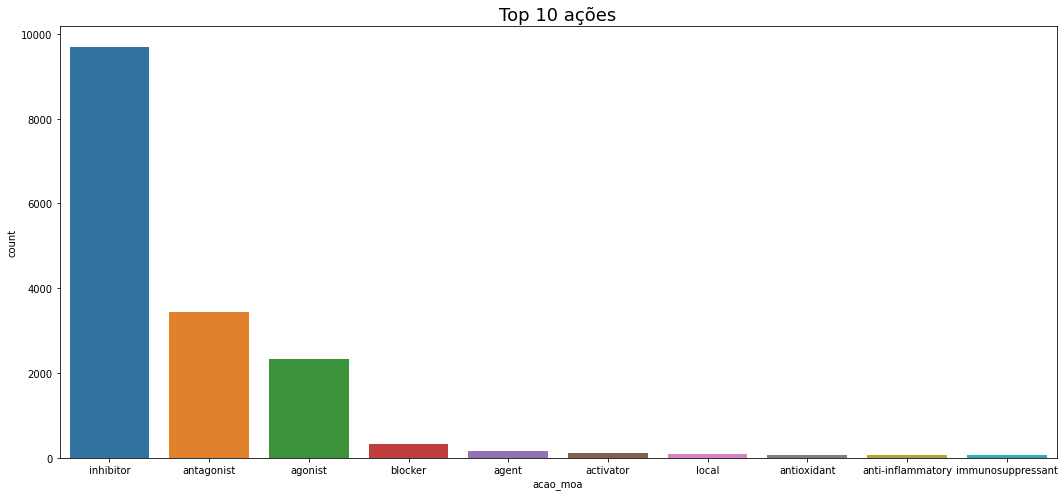

In [254]:
# plotando as top 10 ações
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=df_moa_count.index, y="count", data=df_moa_count)
ax.set_title('Top 10 ações', fontsize=18)
plt.tight_layout()

A ação `inhibitor` foi a mais utilizada.

Agora vamos verificar quantos mecanismos de ação cada experimento ativou, se é que ativou algum.

In [155]:
# soma linhas (quantos moa por experimento)
df_r.sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

Como pudemos reparar, existem alguns experimentos (linhas) que não ativaram nenhum mecanismo de ação, ou seja, não houve resposta ao estímulo.

Com isso, é interessante verificarmos quais desses experimentos receberam tratamento `com_droga` e `com_controle`, para entender quais não tiveram reação ao composto dado.

Lembrando que é esperado que `com_controle` não ative nenhum mecanismo de ação já que não é fornecido nenhum composto, mas `com_droga` sim.

Para isso, iremos concatenar os dois dataframes pois a informação sobre o tratamento está no dataset de experimentos.

In [156]:
# criando coluna n_moa com o resultado anterior
df_r['n_moa'] = df_r.sum(axis=1)

# criando coluna que indica onde o n_moa não é zero
df_r['moa_ativo'] = df_r.n_moa != 0

# verificando as primeiras entradas para ver as novas colunas no final
df_r.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_ativo
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [157]:
# merge dos dfs
df_merge = pd.merge(df2, df_r[['id', 'n_moa', 'moa_ativo']], on='id')
df_merge.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,moa_ativo
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [158]:
# verificando os tipos de entradas para tratamento com_controle
df_merge.query('tratamento == "com_controle"')['moa_ativo'].unique()

array([False])

In [179]:
# verificando os tipos de entradas para tratamento com_controle
df_merge.query('tratamento == "com_droga"')['moa_ativo'].value_counts(normalize=True)

True     0.658238
False    0.341762
Name: moa_ativo, dtype: float64

Ótimo! Confirmamos então que os experimentos que não receberam compostos (tratamento=com_controle) não ativaram nenhum mecanismo de ação, conforme esperado.

Já nos experimentos que receberam algum composto, observamos que ~34% deles não ativaram nenhum mecanismo de ação.

Vamos plotar os boxplot para verificar a distribuição dos top 5 compostos para um gene específico (vamos usar o `g0`)

In [255]:
# extraindo o nome dos top 5 compostos
top5_composto = df_merge_coded.composto.value_counts().index[:5]
top5_composto

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

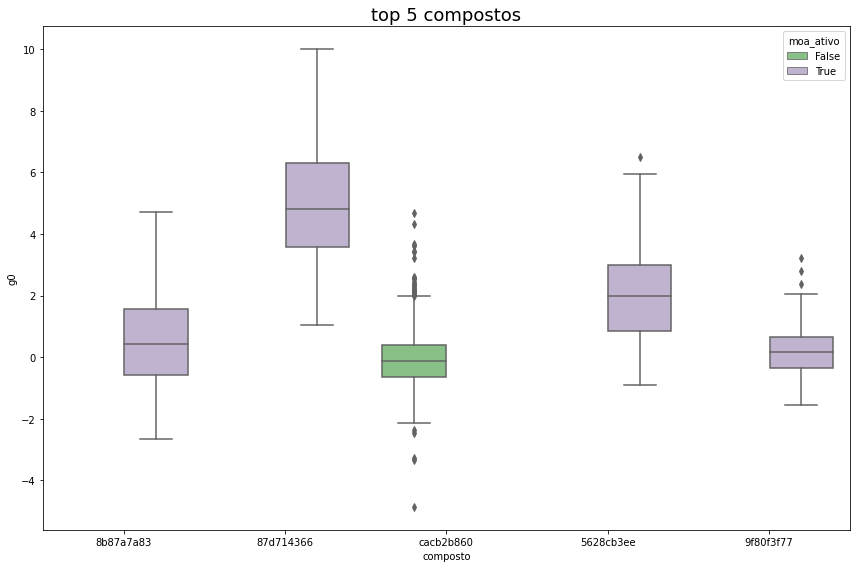

In [271]:
# plotando o boxplot
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data = df_merge_coded.query('composto in @top5_composto'), y= 'g0', x='composto', hue='moa_ativo', palette='Accent')
ax.set_title('top 5 compostos', fontsize=18)

plt.tight_layout()

Precisamos investigar mais considerando que existem outros fatores influenciando esses boxplots plotados.

Vamos então escolher o composto `87d714366` que foi identificado acima como o mais utilizado e fazer a análise comparativa com `com_controle` considerando tempo e dose.

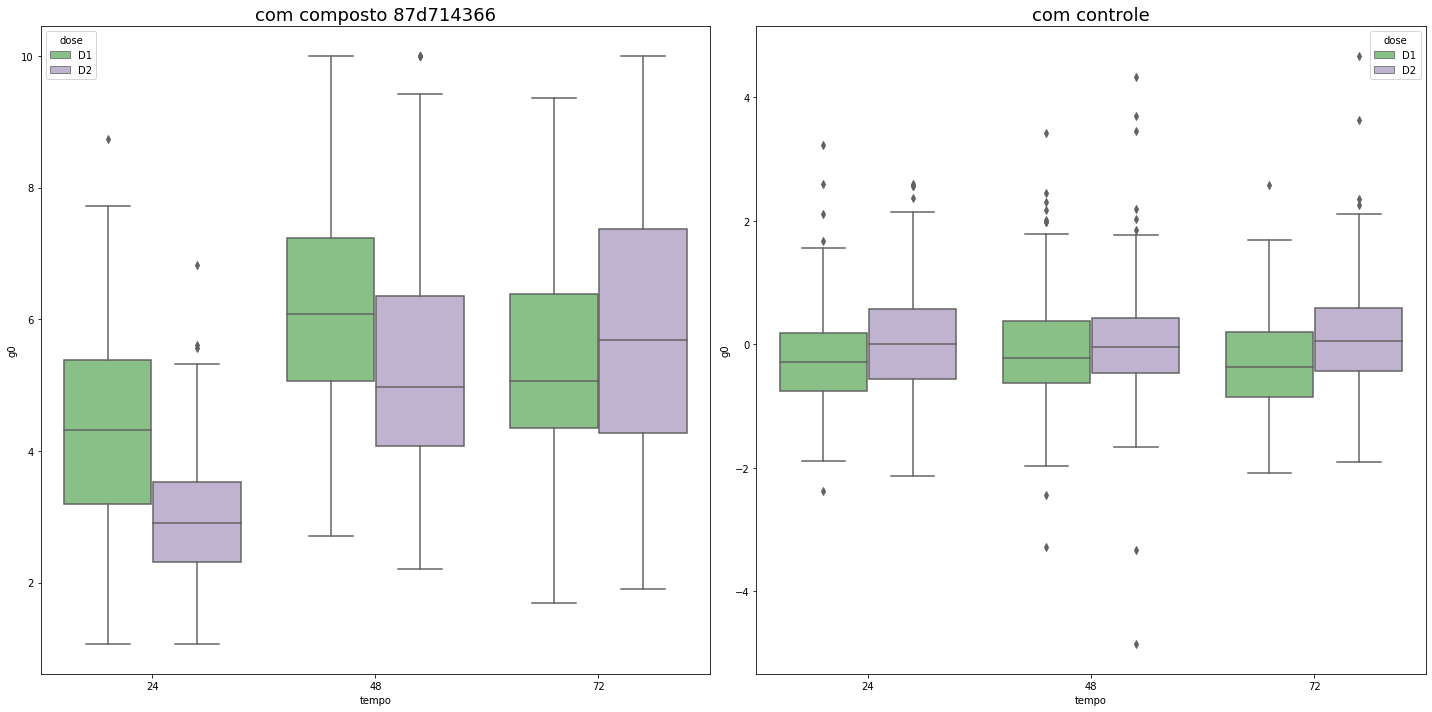

In [272]:
# fatiando o dataframe para o composto escolhido e controle
composto = df_merge[df_merge.composto == '87d714366']
controle = df_merge[df_merge.tratamento == 'com_controle']

# plotando os boxplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.boxplot(data=composto,y='g0', x='tempo', hue='dose',ax=ax1, palette='Accent')
ax1.set_title('com composto 87d714366', fontsize=18)

sns.boxplot(data=controle,y='g0', x='tempo', hue='dose',ax=ax2, palette='Accent')
ax2.set_title('com controle', fontsize=18)
plt.tight_layout()

É nítida a diferença entre os boxplots do gene submetido ao composto 87d714366 (esquerda) e do mesmo gene com controle, ou seja, não submetido a nenhum composto (direita).

Ao ser submetido ao composto escolhido, a dose e o tempo tem alta influência em seu comportamento, no entando, com controle se mantém estável.

### Codificando as variáveis categóricas

Vamos criar uma coluna `com_controle` que vai indicar quando o tratamento foi com controle.

Faremos também a transformação da variável categórica múltipla `tempo` para três colunas binárias `24`, `48` e `72`.

In [176]:
# codificando as variáveis categoricas
df_merge_coded = pd.get_dummies(df_merge, columns=['tratamento', 'tempo'])
df_merge_coded=df_merge_coded.drop('tratamento_com_droga', axis=1)
df_merge_coded.head()

,id,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,moa_ativo,tratamento_com_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,0,0
1,id_000779bfc,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,0,1
2,id_000a6266a,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,0,1,0
3,id_0015fd391,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,0,1,0
4,id_001626bd3,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,0,0,1
